In [1]:
#seasonal_profits
#top_10_genre_counts
#budget_counts

In [2]:
#import all the libraries we need
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3 
#import scipy.stats as stats
#import statsmodels.api as sm
import matplotlib.pyplot as plt
#from sklearn.datasets import make_regression
#from scipy.interpolate import make_interp_spline

%matplotlib inline



In [3]:
#preview the movie genre dataset
#the movie database
movie_genre = pd.read_csv('../zippedData/tmdb.movies.csv', index_col= 0)
movie_genre.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
movie_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [5]:
#preview the movie budget dataset
#the numbers
movie_budget = pd.read_csv('../zippedData/tn.movie_budgets.csv', index_col= 0)
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [7]:
conn = sqlite3.connect('../zippedData/im.db')
cur = conn.cursor()

In [8]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [9]:
#imdb
conn = sqlite3.connect('../zippedData/im.db')

query= """
        SELECT mov.genres, mov.primary_title
        FROM movie_basics AS mov;
        """

df = pd.read_sql(query, conn)


df['genres'] = df['genres'].str.split(',') 
df = df.explode('genres', ignore_index=True)  

df.head(10)

,genres,primary_title
0,Action,Sunghursh
1,Crime,Sunghursh
2,Drama,Sunghursh
3,Biography,One Day Before the Rainy Season
4,Drama,One Day Before the Rainy Season
5,Drama,The Other Side of the Wind
6,Comedy,Sabse Bada Sukh
7,Drama,Sabse Bada Sukh
8,Comedy,The Wandering Soap Opera
9,Drama,The Wandering Soap Opera


In [10]:
movie_genres= df
len(movie_genres)

234958

In [11]:
movie_genres.rename(columns={'primary_title': 'movie'}, inplace=True)


In [12]:
len(movie_budget)

5782

In [13]:
movies_df =movie_budget.merge(movie_genres, how='outer', on=['movie'])


movies_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Fantasy
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Action


In [14]:
len(movies_df['movie'].unique())

139457

In [15]:
len(movies_df)

238759

In [16]:
movies_df.drop_duplicates(keep='first', inplace=True)
len(movies_df)

232099

In [17]:
movies_df.drop(columns=['worldwide_gross'], inplace=True)


In [18]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",Fantasy
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",Action


In [19]:
movies_df.dropna(subset=['production_budget', 'domestic_gross'], inplace=True)


In [20]:
x=['production_budget','domestic_gross']

for col in x:
    movies_df[col] = movies_df[col].replace({'\$': '', ',': ''}, regex=True).astype(int)

movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action


In [21]:
movies_df['ROI']=movies_df['domestic_gross']-movies_df['production_budget']

In [22]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650


In [23]:
movies_df['ROI'].describe()

count    1.020900e+04
mean     9.754699e+06
std      5.318560e+07
min     -3.072376e+08
25%     -1.041056e+07
50%     -6.977400e+05
75%      1.774096e+07
max      6.306622e+08
Name: ROI, dtype: float64

In [24]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650


In [25]:
movies_df['profit_multiplier']= movies_df['domestic_gross']/movies_df['production_budget']
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI,profict_multiplier
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625,1.789430
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125,0.587101
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125,0.587101
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125,0.587101
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650,0.122178


In [26]:
def profitability(num):
    if 0 < num < 1:
        x='Investment Loss'
    elif 1 < num < 2:
        x='Profit Made'
    else:
        x='Investment Doubled'
    return x


In [27]:
movies_df['profitability']= movies_df['profit_multiplier'].apply(lambda x: profitability(x))
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI,profict_multiplier,profitability
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625,1.789430,Profit Made
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125,0.587101,Investment Loss
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125,0.587101,Investment Loss
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125,0.587101,Investment Loss
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650,0.122178,Investment Loss


# the great year filter

In [28]:
#filter the movies into recent movies (start with 5 years)
movies_df['year']= movies_df['release_date'].str[-4:].astype(int)
movies_df.head()


,release_date,movie,production_budget,domestic_gross,genres,ROI,profict_multiplier,profitability,year
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625,1.789430,Profit Made,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125,0.587101,Investment Loss,2011
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125,0.587101,Investment Loss,2011
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125,0.587101,Investment Loss,2011
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650,0.122178,Investment Loss,2019


In [29]:
len(movies_df)

10209

In [30]:
movies_df['year'].describe()

count    10209.000000
mean      2006.663238
std         12.005175
min       1915.000000
25%       2002.000000
50%       2010.000000
75%       2014.000000
max       2020.000000
Name: year, dtype: float64

In [31]:
#set the frame equal to only movies from 2015 and newer
movies_df= movies_df[movies_df['year']>= 2015]
len(movies_df)

2497

In [32]:
movies_df['year'].describe()

count    2497.000000
mean     2016.352823
std         1.295666
min      2015.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [33]:
#amount of movies from 2015-2020
len(movies_df['movie'].unique())

938

In [34]:
release_date_analysis=movies_df[['release_date','movie','ROI', 'profitability']]
release_date_analysis.head()

,release_date,movie,ROI,profitability
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
5,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
6,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made
8,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made


In [35]:
len(release_date_analysis)

2497

In [36]:
movie_genre_analysis=movies_df[['movie','genres','ROI','profitability']]
movie_genre_analysis.head()

,movie,genres,ROI,profitability
4,Dark Phoenix,Action,-307237650,Investment Loss
5,Dark Phoenix,Adventure,-307237650,Investment Loss
6,Dark Phoenix,Sci-Fi,-307237650,Investment Loss
7,Avengers: Age of Ultron,Action,128405868,Profit Made
8,Avengers: Age of Ultron,Adventure,128405868,Profit Made


In [37]:
len(movie_genre_analysis)

2497

In [38]:
release_date_analysis_v1=release_date_analysis.drop_duplicates(keep='first')
len(release_date_analysis_v1)

938

In [39]:
release_date_analysis_v1 = release_date_analysis_v1.drop_duplicates(subset=['movie'], keep='first')
len(release_date_analysis_v1)

938

In [40]:
budget_analysis=movies_df[['movie','production_budget','ROI','profitability']]
budget_analysis.head()

,movie,production_budget,ROI,profitability
4,Dark Phoenix,350000000,-307237650,Investment Loss
5,Dark Phoenix,350000000,-307237650,Investment Loss
6,Dark Phoenix,350000000,-307237650,Investment Loss
7,Avengers: Age of Ultron,330600000,128405868,Profit Made
8,Avengers: Age of Ultron,330600000,128405868,Profit Made


In [41]:
len(budget_analysis)

2497

In [42]:
budget_analysis = budget_analysis.drop_duplicates(subset=['movie'], keep='first')
len(budget_analysis)

938

## Datasets shown here

In [43]:
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made
11,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,630662225,Investment Doubled
12,"Apr 27, 2018",Avengers: Infinity War,378815482,Investment Doubled


In [44]:
movie_genre_analysis.head()

,movie,genres,ROI,profitability
4,Dark Phoenix,Action,-307237650,Investment Loss
5,Dark Phoenix,Adventure,-307237650,Investment Loss
6,Dark Phoenix,Sci-Fi,-307237650,Investment Loss
7,Avengers: Age of Ultron,Action,128405868,Profit Made
8,Avengers: Age of Ultron,Adventure,128405868,Profit Made


In [45]:
budget_analysis.head()

,movie,production_budget,ROI,profitability
4,Dark Phoenix,350000000,-307237650,Investment Loss
7,Avengers: Age of Ultron,330600000,128405868,Profit Made
10,Star Wars Ep. VIII: The Last Jedi,317000000,303181382,Profit Made
11,Star Wars Ep. VII: The Force Awakens,306000000,630662225,Investment Doubled
12,Avengers: Infinity War,300000000,378815482,Investment Doubled


## workd on finalizing release date data

In [46]:
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made
11,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,630662225,Investment Doubled
12,"Apr 27, 2018",Avengers: Infinity War,378815482,Investment Doubled


In [47]:
release_date_analysis_v1['Release_Month']= release_date_analysis_v1['release_date'].str[:3]
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability,Release_Month
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss,Jun
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made,May
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made,Dec
11,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,630662225,Investment Doubled,Dec
12,"Apr 27, 2018",Avengers: Infinity War,378815482,Investment Doubled,Apr


In [48]:
def month_to_season(month):
    season_dict= { 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
                  'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
                  'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall',
                  'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter'}
    return season_dict.get(month)
    

In [49]:
release_date_analysis_v1['Season']= release_date_analysis_v1['Release_Month'].apply( lambda x : month_to_season(x))
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability,Release_Month,Season
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss,Jun,Summer
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made,May,Spring
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made,Dec,Winter
11,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,630662225,Investment Doubled,Dec,Winter
12,"Apr 27, 2018",Avengers: Infinity War,378815482,Investment Doubled,Apr,Spring


In [50]:
Seasonal_ROI = release_date_analysis_v1[['Season','ROI','profitability']]
Seasonal_ROI.head()

,Season,ROI,profitability
4,Summer,-307237650,Investment Loss
7,Spring,128405868,Profit Made
10,Winter,303181382,Profit Made
11,Winter,630662225,Investment Doubled
12,Spring,378815482,Investment Doubled


## work on finalizing genre data

In [51]:
movie_genre_analysis.head()

,movie,genres,ROI,profitability
4,Dark Phoenix,Action,-307237650,Investment Loss
5,Dark Phoenix,Adventure,-307237650,Investment Loss
6,Dark Phoenix,Sci-Fi,-307237650,Investment Loss
7,Avengers: Age of Ultron,Action,128405868,Profit Made
8,Avengers: Age of Ultron,Adventure,128405868,Profit Made


In [52]:
len(movie_genre_analysis)

2497

In [53]:
movie_genre_analysis[movie_genre_analysis['genres'].isna()]

,movie,genres,ROI,profitability
10,Star Wars Ep. VIII: The Last Jedi,NaN,303181382,Profit Made
11,Star Wars Ep. VII: The Force Awakens,NaN,630662225,Investment Doubled
110,Robin Hood,NaN,-68175372,Investment Loss
141,Guardians of the Galaxy Vol 2,NaN,189813101,Profit Made
265,Mission: ImpossibleâFallout,NaN,42159104,Profit Made
...,...,...,...,...
11097,Une Femme MariÃ©e,NaN,-120000,Investment Doubled
11133,Closure,NaN,-100000,Investment Doubled
11139,Lunchtime Heroes,NaN,-100000,Investment Doubled
11218,Exeter,NaN,-25000,Investment Doubled


In [54]:
movie_genre_analysis= movie_genre_analysis.dropna(subset=['genres'])


In [55]:
len(movie_genre_analysis)

2326

In [56]:
movie_genre_analysis.head()

,movie,genres,ROI,profitability
4,Dark Phoenix,Action,-307237650,Investment Loss
5,Dark Phoenix,Adventure,-307237650,Investment Loss
6,Dark Phoenix,Sci-Fi,-307237650,Investment Loss
7,Avengers: Age of Ultron,Action,128405868,Profit Made
8,Avengers: Age of Ultron,Adventure,128405868,Profit Made


In [57]:
Genre_ROI=movie_genre_analysis[['genres','ROI','profitability']]
Genre_ROI.head()

,genres,ROI,profitability
4,Action,-307237650,Investment Loss
5,Adventure,-307237650,Investment Loss
6,Sci-Fi,-307237650,Investment Loss
7,Action,128405868,Profit Made
8,Adventure,128405868,Profit Made


## work on finalizing budget data

In [58]:
budget_analysis.head()

,movie,production_budget,ROI,profitability
4,Dark Phoenix,350000000,-307237650,Investment Loss
7,Avengers: Age of Ultron,330600000,128405868,Profit Made
10,Star Wars Ep. VIII: The Last Jedi,317000000,303181382,Profit Made
11,Star Wars Ep. VII: The Force Awakens,306000000,630662225,Investment Doubled
12,Avengers: Infinity War,300000000,378815482,Investment Doubled


In [59]:
Budget_ROI= budget_analysis[['production_budget', 'ROI','profitability']]
Budget_ROI.head()

,production_budget,ROI,profitability
4,350000000,-307237650,Investment Loss
7,330600000,128405868,Profit Made
10,317000000,303181382,Profit Made
11,306000000,630662225,Investment Doubled
12,300000000,378815482,Investment Doubled


In [60]:
len(Budget_ROI)

938

## start exploring the data distrobutions

In [61]:
#Seasonal_ROI
#Genre_ROI
#Budget_ROI

In [62]:
Seasonal_ROI['Season'].value_counts()

Season
Winter    270
Fall      237
Spring    234
Summer    197
Name: count, dtype: int64

In [63]:
Seasonal_ROI.head()

,Season,ROI,profitability
4,Summer,-307237650,Investment Loss
7,Spring,128405868,Profit Made
10,Winter,303181382,Profit Made
11,Winter,630662225,Investment Doubled
12,Spring,378815482,Investment Doubled


In [64]:
Seasonal_ROI.profitability.value_counts()

profitability
Investment Doubled    419
Investment Loss       369
Profit Made           150
Name: count, dtype: int64

In [65]:
seasonal_profits = Seasonal_ROI.groupby('Season')['profitability'].value_counts().unstack(fill_value=0)

print(seasonal_profits)


profitability  Investment Doubled  Investment Loss  Profit Made
Season                                                         
Fall                           89              101           47
Spring                        102               96           36
Summer                         82               81           34
Winter                        146               91           33


In [66]:
seasonal_profits=seasonal_profits.reset_index()

In [67]:
seasonal_profits.head()

profitability,Season,Investment Doubled,Investment Loss,Profit Made
0,Fall,89,101,47
1,Spring,102,96,36
2,Summer,82,81,34
3,Winter,146,91,33


In [68]:
Genre_ROI.head()

,genres,ROI,profitability
4,Action,-307237650,Investment Loss
5,Adventure,-307237650,Investment Loss
6,Sci-Fi,-307237650,Investment Loss
7,Action,128405868,Profit Made
8,Adventure,128405868,Profit Made


In [69]:
Genre_ROI['genres'].value_counts()

genres
Drama          418
Comedy         264
Action         260
Adventure      210
Thriller       158
Horror         139
Crime          129
Biography      111
Romance         87
Mystery         87
Documentary     81
Sci-Fi          77
Fantasy         69
Animation       59
Family          49
History         44
Music           33
Sport           24
War             14
Musical          6
Western          5
News             1
Reality-TV       1
Name: count, dtype: int64

In [70]:
genre_counts = Genre_ROI.groupby('genres')['profitability'].value_counts().unstack(fill_value=0)
genre_counts= genre_counts.sort_values(by=['Investment Doubled'], ascending=[False])
genre_counts= genre_counts.reset_index()

genre_counts.head()

profitability,genres,Investment Doubled,Investment Loss,Profit Made
0,Drama,178,177,63
1,Comedy,114,90,60
2,Horror,91,35,13
3,Action,81,128,51
4,Thriller,76,57,25


In [71]:
top_10_genre_counts= genre_counts.head(10)
top_10_genre_counts

profitability,genres,Investment Doubled,Investment Loss,Profit Made
0,Drama,178,177,63
1,Comedy,114,90,60
2,Horror,91,35,13
3,Action,81,128,51
4,Thriller,76,57,25
5,Adventure,66,100,44
6,Mystery,53,24,10
7,Crime,50,56,23
8,Documentary,43,30,8
9,Romance,43,29,15


In [72]:
Budget_ROI.head()

,production_budget,ROI,profitability
4,350000000,-307237650,Investment Loss
7,330600000,128405868,Profit Made
10,317000000,303181382,Profit Made
11,306000000,630662225,Investment Doubled
12,300000000,378815482,Investment Doubled


In [73]:
#low budget = 5,000,000 and under
#mid level budget = between 5,000,000 and 50,000,000
#high end budget= over 50,000,000

In [74]:
def budget_leveler(budget):
    if 0 < budget < 5000000:
        x='Low Budget'
    elif 5000000 < budget < 50000000:
        x='Mid Level Budget'
    else:
        x='High End Budget'
    return x

In [75]:
Budget_ROI['level']= Budget_ROI['production_budget'].apply(lambda x: budget_leveler(x))
Budget_ROI.head()

,production_budget,ROI,profitability,level
4,350000000,-307237650,Investment Loss,High End Budget
7,330600000,128405868,Profit Made,High End Budget
10,317000000,303181382,Profit Made,High End Budget
11,306000000,630662225,Investment Doubled,High End Budget
12,300000000,378815482,Investment Doubled,High End Budget


In [76]:
budget_counts = Budget_ROI.groupby('level')['profitability'].value_counts().unstack(fill_value=0)
budget_counts= budget_counts.reset_index()
print(budget_counts)


profitability             level  Investment Doubled  Investment Loss  \
0               High End Budget                  82              131   
1                    Low Budget                 152               58   
2              Mid Level Budget                 185              180   

profitability  Profit Made  
0                       62  
1                       12  
2                       76  


In [77]:
budget_counts.head()

profitability,level,Investment Doubled,Investment Loss,Profit Made
0,High End Budget,82,131,62
1,Low Budget,152,58,12
2,Mid Level Budget,185,180,76


In [78]:
Budget_ROI['level'].value_counts()

level
Mid Level Budget    441
High End Budget     275
Low Budget          222
Name: count, dtype: int64

# graph the new datasets

In [79]:
#seasonal_profits
#top_10_genre_counts
#budget_counts

In [80]:
budget_counts

profitability,level,Investment Doubled,Investment Loss,Profit Made
0,High End Budget,82,131,62
1,Low Budget,152,58,12
2,Mid Level Budget,185,180,76


In [81]:
budget_counts2 = budget_counts[[budget_counts.columns[0], budget_counts.columns[2], budget_counts.columns[3], budget_counts.columns[1]]]
budget_counts2 = pd.concat([budget_counts2.iloc[1:], budget_counts2.iloc[:1]], ignore_index=True)
budget_counts2= budget_counts2.set_index('level')
budget_counts2['Profit Made']= budget_counts2['Profit Made']+ budget_counts2['Investment Doubled']
budget_counts2= budget_counts2.reset_index()
budget_counts2.head()

profitability,level,Investment Loss,Profit Made,Investment Doubled
0,Low Budget,58,164,152
1,Mid Level Budget,180,261,185
2,High End Budget,131,144,82


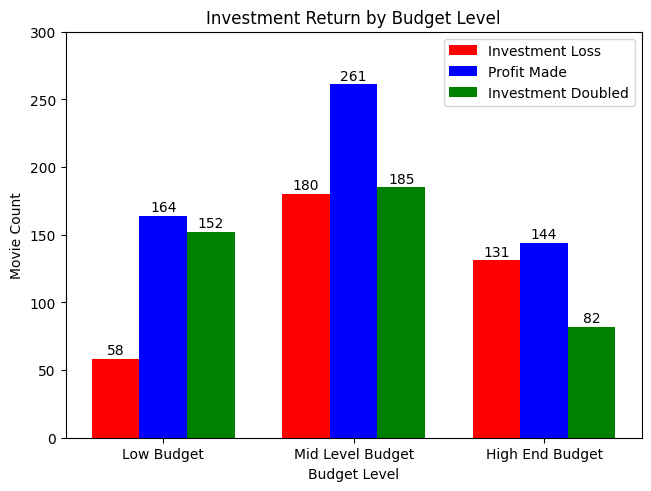

In [82]:
budgets = budget_counts2['level']
losses= budget_counts2['Investment Loss'].to_list()
profits= budget_counts2['Profit Made'].to_list()
doubles= budget_counts2['Investment Doubled'].to_list()

budget_counts = {
    'Investment Loss': losses,
    'Profit Made': profits,
    'Investment Doubled': doubles
    }

x = np.arange(len(budgets)) 
width = 0.25  
multiplier = 0

colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(layout='constrained')

for (attribute, measurement), color in zip(budget_counts.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color= color)
    ax.bar_label(rects, padding=1)
    multiplier += 1


ax.set_ylabel('Movie Count')
ax.set_xlabel('Budget Level')
ax.set_title('Investment Return by Budget Level')
ax.set_xticks(x + width, budgets)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 300)

plt.show()

In [83]:
top_10_genre_counts.head()

profitability,genres,Investment Doubled,Investment Loss,Profit Made
0,Drama,178,177,63
1,Comedy,114,90,60
2,Horror,91,35,13
3,Action,81,128,51
4,Thriller,76,57,25


In [84]:
top_10_genre_counts.columns[0]

'genres'

In [85]:
top_10_genre_counts2 = top_10_genre_counts[[top_10_genre_counts.columns[0], top_10_genre_counts.columns[2], 
                                             top_10_genre_counts.columns[3], top_10_genre_counts.columns[1]]]
top_10_genre_counts2['Profit Made']= top_10_genre_counts2['Profit Made']+ top_10_genre_counts2['Investment Doubled']
top_10_genre_counts2

profitability,genres,Investment Loss,Profit Made,Investment Doubled
0,Drama,177,241,178
1,Comedy,90,174,114
2,Horror,35,104,91
3,Action,128,132,81
4,Thriller,57,101,76
5,Adventure,100,110,66
6,Mystery,24,63,53
7,Crime,56,73,50
8,Documentary,30,51,43
9,Romance,29,58,43


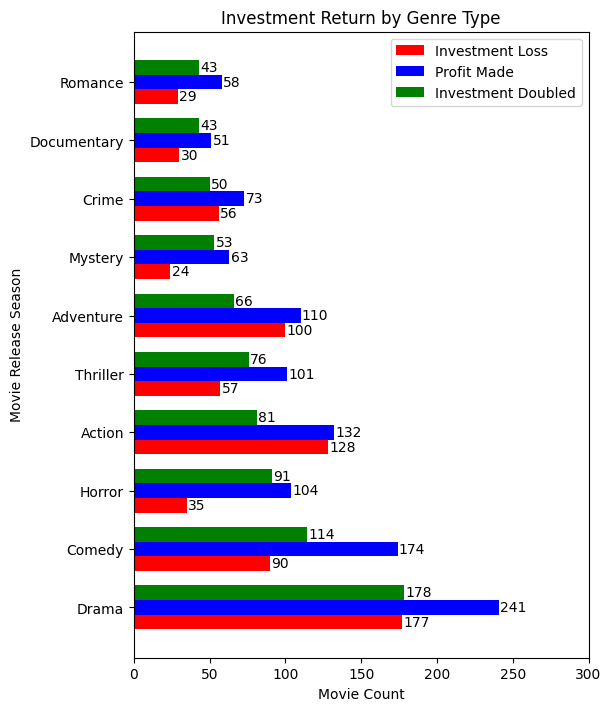

In [91]:
genres = top_10_genre_counts2['genres']
losses = top_10_genre_counts2['Investment Loss'].to_list()
profits = top_10_genre_counts2['Profit Made'].to_list()
doubles = top_10_genre_counts2['Investment Doubled'].to_list()

genre_counts = {
    'Investment Loss': losses,
    'Profit Made': profits,
    'Investment Doubled': doubles
}

y = np.arange(len(genres))  
height = 0.25  
multiplier = 0  

colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(layout='constrained', figsize=(6,7))

for (attribute, measurement), color in zip(genre_counts.items(), colors):
    offset = height * multiplier  
    rects = ax.barh(y+ offset, measurement, height, label=attribute, color=color) 
    ax.bar_label(rects, padding=1)  
    multiplier += 1  

ax.set_xlabel('Movie Count')  
ax.set_ylabel('Movie Release Season')
ax.set_title('Investment Return by Genre Type')
ax.set_yticks(y+ height, genres)

ax.legend(loc='upper right', ncols=1)

ax.set_xlim(0, 300)

plt.show()


In [87]:
seasonal_profits

profitability,Season,Investment Doubled,Investment Loss,Profit Made
0,Fall,89,101,47
1,Spring,102,96,36
2,Summer,82,81,34
3,Winter,146,91,33


In [88]:
seasonal_profits2 = seasonal_profits[[seasonal_profits.columns[0], seasonal_profits.columns[2], 
                                      seasonal_profits.columns[3], seasonal_profits.columns[1]]]
seasonal_profits2 = pd.concat([seasonal_profits2.iloc[1:2], seasonal_profits2.iloc[2:3], 
                               seasonal_profits2.iloc[:1], seasonal_profits2.iloc[3:]], ignore_index=True)
seasonal_profits2['Profit Made']= seasonal_profits2['Profit Made']+ seasonal_profits2['Investment Doubled']
seasonal_profits2.head()

profitability,Season,Investment Loss,Profit Made,Investment Doubled
0,Spring,96,138,102
1,Summer,81,116,82
2,Fall,101,136,89
3,Winter,91,179,146


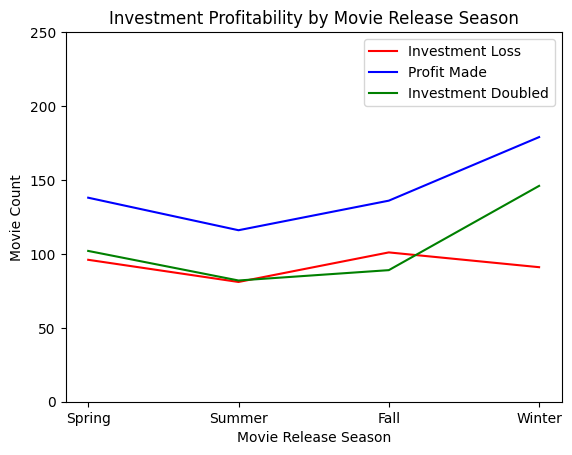

In [89]:
loss = seasonal_profits2['Investment Loss']
profit = seasonal_profits2['Profit Made']
doubled = seasonal_profits2['Investment Doubled']
Season = seasonal_profits2['Season'].tolist()

fig, ax = plt.subplots()
ax.plot(Season, loss, label= "Investment Loss", color= 'red')
ax.plot(Season, profit, label= "Profit Made", color= 'blue')
ax.plot(Season, doubled, label= "Investment Doubled", color= 'green')
ax.legend()
ax.set_ylim(0,250)
ax.set_ylabel('Movie Count')
ax.set_xlabel('Movie Release Season')
ax.set_title('Investment Profitability by Movie Release Season')


plt.show()